# Linear regression on test data set for Econ 400.

In [46]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

In [80]:
students = (1,2,3,4,5)
GPA = (2.8,3.4,3.1,3.5,3.7)
ACT = (22,27,26,25,30)
ACT_plus = (27,32,31,30,35)
d = {'students': [1,2,3,4,5],
    'GPA': [2.8,3.4,3.1,3.5,3.7],
    'ACT': ACT_plus}
df = pd.DataFrame(data = d)
df

,students,GPA,ACT
0,1,2.8,27
1,2,3.4,32
2,3,3.1,31
3,4,3.5,30
4,5,3.7,35


1.1

In [76]:
def linear_regression_descriptive(table, x, y):
    xval = table[x]
    yval= table[y]
    
    def correlation(table, x, y):
        def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    correlation = correlation(table, xval, yval)
    
    def slope_econ(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x, y)
    
    def intercept(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        def slope_econ(table, x_column, y_column):
            return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
        slope = slope_econ(table, x_column, y_column)
        intercept = np.average(yi-slope*xbar)
        return intercept
    intercept = intercept(table,x,y)
    
    predicted = intercept + slope*xval
    residuals = yval - predicted
    MRSE = np.sqrt(np.mean(residuals**2))
    
    predicted_table1 = table.copy()
    predicted_table1['predicted'] = predicted
    predicted_table = predicted_table1.copy()
    predicted_table['residuals'] = residuals
    
    #Prints the estimated regression line.
    print('Predicted y Value =', slope, 'x', '+', intercept)
    print('r =', correlation)
    print('Sum of residuals =', np.sum(predicted_table['residuals']))
    print('MRSE =', MRSE)
    
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y]);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xval), max(xval))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residuals']);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residuals')
    plots.show();
    
    return predicted_table

Predicted y Value = 0.10294117647058827 x + 0.10882352941176361
r = 0.8488746876271653
Sum of residuals = 8.881784197001252e-16
MRSE = 0.16715614398097436


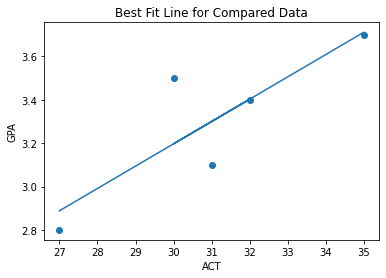

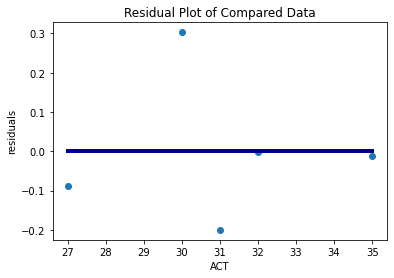

In [110]:
predicted = linear_regression_descriptive(df, 'ACT', 'GPA')

In [113]:
np.sum(predicted['residuals'])

8.881784197001252e-16

Predicted y Value = 0.10294117647058827 x + 0.10882352941176361
r = 0.8488746876271653
Sum of residuals = 8.881784197001252e-16
MRSE = 0.16715614398097436


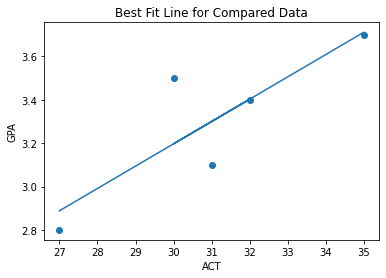

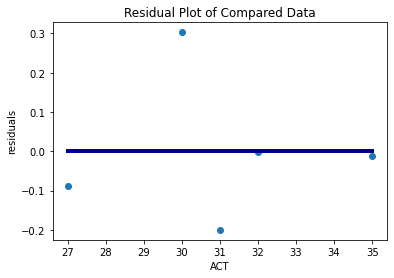

,students,GPA,ACT,predicted,residuals
0,1,2.8,27,2.888235,-0.088235
1,2,3.4,32,3.402941,-0.002941
2,3,3.1,31,3.300000,-0.200000
3,4,3.5,30,3.197059,0.302941
4,5,3.7,35,3.711765,-0.011765


In [82]:
linear_regression_descriptive(df, 'ACT', 'GPA')

# 2

2.1

In [58]:
698.9-2.28*18

657.86

In [59]:
698.9-2.28*27

637.34


# 3

 gen shareA = expendA / (expendA+expendB)

mean shareA

3.1
twoway (scatter voteA shareA) (lfit voteA shareA)



In [109]:
26.81221 +46.38269*.5



50.003555

In [ ]:
For 3.5, did everyone get 50.00?

In [67]:
26.81221 +46.38269*.5, 26.81221 +46.38269*.6, 26.81221 +46.38269*.7

(50.003555, 54.641824, 59.280092999999994)

In [68]:
50.003555 - 54.641824

-4.638269000000001

In [69]:
54.641824 - 59.280092999999994

-4.638268999999994

In [70]:
60 = 26.81221 +46.38269*x


SyntaxError: cannot assign to literal (<ipython-input-70-ca4bffa98bb5>, line 1)

In [71]:
(60-26.81221) / 46.38269

0.7155210273487804

# 4

In [72]:
y = 963.1913 + 18.50119 * x

NameError: name 'x' is not defined

In [73]:
y = 963.1913 + 18.50119 * 20
y

1333.2151

In [84]:
z = 963.1913 + 18.50119 * 25

In [86]:
z-y

92.50595000000021

4.6


In [115]:
1160-(963.1913 + 18.50119 * 16.1)

-101.06045900000004

4.8
y = 963.1913+1850.119*x

4.9

In [92]:
y = 963.1913+1850.119*.2
y

1333.2151

In [93]:
z = 963.1913+1850.119*.25
z-y

92.50594999999998

In [96]:
y = 963.1913+1850.119*.161
y -1160

101.06045899999981

5


y =  .2566717*x + 4.821997

5.1

In [100]:
y1 =  .2566717*1 + 4.821997
y2 =  .2566717*1.1 + 4.821997
y2 - y1

0.025667170000000183

In [101]:
change = .2566717*.1
change 

0.025667170000000003

In [103]:
3000000

3000000

In [106]:
y3 =  .2566717*3000000 + 4.821997
y3

770019.921997